In [12]:
import numpy as np
import scipy as sc

## Linear equations

In [4]:
a = np.array([[3,1],[1,2]])
b = np.array([9,7])
x = np.linalg.solve(a,b)
print(x)

[2.2 2.4]


In [13]:
from scipy import linalg
x = sc.linalg.solve(a, b, assume_a='gen') #gen, sym, her, pos
x

array([2.2, 2.4])

In [18]:
A = np.array([[1,3,5], [2,5,1], [2,3,8]])
Ainv = np.linalg.inv(A)
A.dot(Ainv)

array([[ 1.00000000e+00,  1.11022302e-16,  4.85722573e-17],
       [-1.38777878e-16,  1.00000000e+00,  7.63278329e-17],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

In [24]:
n = 500
Q = linalg.orth(np.random.rand(n,n))
D = np.logspace(0, -10, n)
A = Q.dot((np.diag(D)).dot(Q.T)) # A = QDQ^T
X = np.random.rand(n)
b = A.dot(X) # b = AX

In [25]:
# inversion, X
y = (linalg.inv(A)).dot(b)
err = linalg.norm(y-X)
res = linalg.norm(A.dot(y)-b) #residual error
print(err, res)

6.5736495790248846e-06 8.378058762357033e-07


In [26]:
# linear solver
y = linalg.solve(A,b)
err = linalg.norm(y-X)
res = linalg.norm(A.dot(y)-b)
print(err, res)

3.752478388119416e-06 4.496403249731884e-15


In [29]:
A = np.array([[1,2],[3,4]])
w, v = linalg.eig(A) # eigh: hermitian
print(w, v)

[-0.37228132+0.j  5.37228132+0.j] [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [36]:
l1, l2 = w
print(l1, l2)

print(v[:,0],v[:,1]) #first, second eigenvector

print(np.sum(abs(v**2), axis=0)) #normalized

v1 = np.array(v[:,0])
print(linalg.norm(A.dot(v1)-l1*v1)) #residual error

(-0.3722813232690143+0j) (5.372281323269014+0j)
[-0.82456484  0.56576746] [-0.41597356 -0.90937671]
[1. 1.]
5.551115123125783e-17


In [38]:
linalg.expm(A)

array([[ 51.9689562 ,  74.73656457],
       [112.10484685, 164.07380305]])

## Nonlinear equation

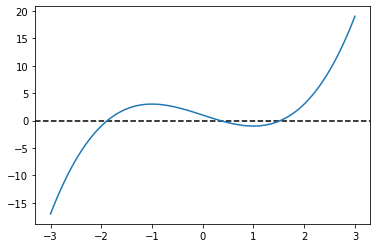

In [39]:
from scipy.optimize import brentq, newton
import matplotlib.pyplot as plt

def f(x):
    return x**3-3*x+1

x = np.linspace(-3, 3, 100)
plt.axhline(0, c='k', ls='--')
plt.plot(x, f(x))

In [40]:
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1, 3) # stable

(-1.8793852415718166, 0.3472963553337031, 1.532088886237956)

In [41]:
newton(f, -3), newton(f, 0), newton(f, 3) # gradient, sometimes unstable

(-1.8793852415718166, 0.34729635533385395, 1.5320888862379578)

In [43]:
from scipy.optimize import root, fsolve
def f(x):
    return [x[1]-3*x[0]*(x[0]+1)*(x[0]-1), 0.25*x[0]**2+x[1]**2-1]

In [44]:
sol = root(f, (0.5, 0.5)) #initial point, various method
sol #sol.x

    fjac: array([[-0.99782686,  0.06589046],
       [-0.06589046, -0.99782686]])
     fun: array([-1.63602465e-12,  1.61870517e-12])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-1.49465503e-08,  1.27017698e-08])
       r: array([ 8.22949362, -0.88256935, -1.72647892])
  status: 1
 success: True
       x: array([1.11694147, 0.82952422])

In [47]:
fsolve(f, (0.5, 0.5))

array([1.11694147, 0.82952422])

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


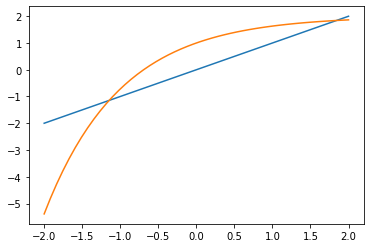

In [55]:
# relaxation method = fixed-point iteration, x=f(x)
x = np.linspace(-2, 2)
plt.plot(x, x)
plt.plot(x, 2-np.exp(-x))
x = 1
for i in range (10):
    x = 2 - np.exp(-x)
    print(x)

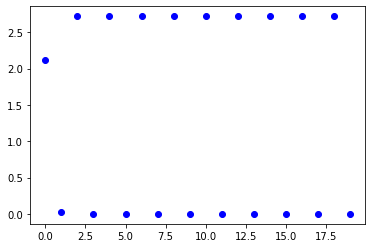

In [65]:
x = 0.5
for i in range (20):
    x = np.exp(1-x**2)
    plt.plot(i, x, 'bo')

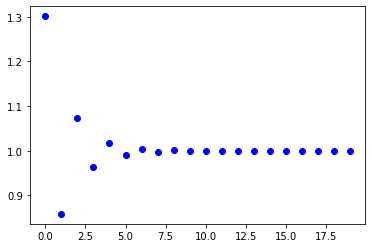

In [66]:
x = 0.5
for i in range (20):
    x = np.sqrt(1-np.log(x))
    plt.plot(i, x, 'bo')

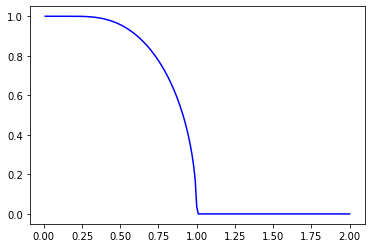

In [72]:
a = 1e-6
temp = np.linspace(0.01, 2, 200)
m = np.zeros(len(temp))

for i in range (len(temp)):
    x = 1
    t = temp[i]
    for j in range (1000):
        y = x
        x = np.tanh(y/t)
        if np.abs((x-y)/(1-t*np.cosh(y/t)**2))<a: break
    m[i] = x
plt.plot(temp, m, 'b-')

In [ ]:
w